#julia BigData web2ajax@gmail.com 01/07/2020


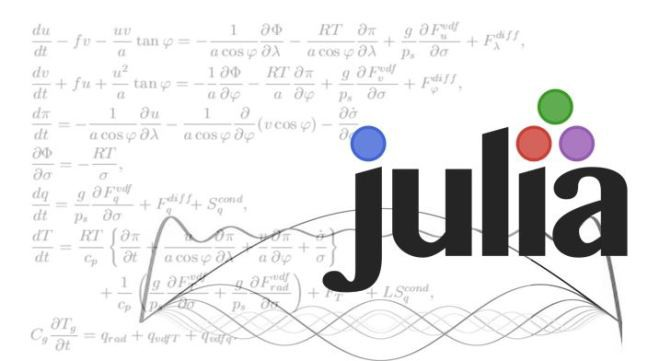

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

In [ ]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CuArrays

    M_gpu = cu(M)
    @benchmark CuArrays.@sync M_gpu^2
else
    println("No GPU found.")
end

No GPU found.


#Load and save DataFrames

In [ ]:
import Pkg; Pkg.add("DataFrames") 
import Pkg; Pkg.add("DataArrays") 
import Pkg; Pkg.add("DataFramesMeta") 
import Pkg; Pkg.add("CSV")
import Pkg; Pkg.add("CSVFiles")
import Pkg; Pkg.add("Serialization")
import Pkg; Pkg.add("JLSO")
import Pkg; Pkg.add("Feather")
import Pkg; Pkg.add("JSONTables")
import Pkg; Pkg.add("CodecZlib")
import Pkg; Pkg.add("ZipFile")
import Pkg; Pkg.add("JDF")
import Pkg; Pkg.add("Statistics")
import Pkg; Pkg.add("Pipe")
import Pkg; Pkg.add("FreqTables")
import Pkg; Pkg.add("BenchmarkTools")
import Pkg; Pkg.add("Query")
import Pkg; Pkg.add("Distributed")

#import Pkg; Pkg.add("StatsPlot ")

In [104]:
using DataFrames, DataFramesMeta, CSV, CSVFiles, Serialization, JLSO,  Feather, JSONTables, CodecZlib,  ZipFile, JDF, Statistics, Pipe, FreqTables, BenchmarkTools, Query, Distributed

In [ ]:
y = CSV.read("/content/x.csv", use_mmap=false)

In [ ]:
y = load("/content/x.csv") |> DataFrame

In [ ]:
eltype.(eachcol(y))

In [ ]:
groupby(y, :Period)

In [ ]:
#https://github.com/alanjones2/dataviz/raw/master/london2018.csv

d = CSV.read("/content/london2018.csv")
print(d)

In [ ]:
d

In [ ]:
x = @from i in d begin
    @where i.Year > 2000 && i.Year < 2019
    @select {i.Month , i.Year, i.Tmin}
    @collect DataFrame
end

In [ ]:
x = readtable("/content/teste.csv")

In [ ]:
bar(d.Month,d.Tmax)

In [ ]:
plot(d.Month, d.Tmax)

In [ ]:
x= 1:10; y = rand(10); # These are the plotting data 
plot(x,y, label="my label")

In [ ]:
plot(d.Month, [d.Tmax, d.Tmin], label=["Tmax","Tmin"])

In [ ]:
scatter(d.Tmax, d.Sun)

In [ ]:
x = 1:5; y = rand(5); # These are the plotting data
pie(x,y)

In [ ]:
plot(0:0.1:20, f, label = "função", size = (400, 300))
plot!(0:20, zero, label = "")
scatter!(Resultado2.raiz, zero, label = "raiz", 
    xaxis = ("x",  0:1:20), 
    yaxis = ("y", -500:50:500))

In [102]:
;pwd

/content


In [ ]:
# visualizar o numero de cores do processador físico
Sys.cpu_summary()

In [ ]:
# verificar o número de cores alocados e ID
procs()

In [ ]:
# adicionar o numero de cores do computador
addprocs()

In [ ]:
# Para remover todos os alocados use rmprocs(procs()) 
rmprocs(procs())

PARALLEL FOR E PARALLEL MAP
Um loop for com um grande número de iterações e compreensões de lista, são melhores desempenhados com execução paralela através da macro

In [109]:
# Função Soma sem paralelismo
# Laço for de uma soma de 1 a 1000000000
# de números aleatórios

function serial_add(n::Int64)
    s = 0.0
    for i = 1:n
        s = s + randn()
    end
    return s
end

serial_add (generic function with 1 method)

In [ ]:
# execute mais de uma vez
@benchmark serial_add(1000000000)

Preparando o paralelismo

In [111]:
# verificar o número de processadores
procs()

1-element Array{Int64,1}:
 1

In [112]:
addprocs()

2-element Array{Int64,1}:
 4
 5

In [113]:
# função paralela

function paralelo_add(n::Int64)
    
  @distributed (+) for i = 1:n
        randn()                  
    end
    
end

paralelo_add (generic function with 1 method)

In [ ]:
# execute mais de uma vez
@benchmark paralelo_add(1000000000)

Função alocação de dados em uma Matriz

In [115]:
function alo_matriz2(n::Int64)
    matriz = zeros(n, n)
    for i = 1:n
        for j = 1:n
            matriz[i, j] = rand()*0.25
        end
    end
    return matriz
end

alo_matriz2 (generic function with 1 method)

In [ ]:
@benchmark alo_matriz2(10000)

In [118]:
GC.gc()

In [119]:
# Função paralela

function alo_matriz1(n::Int64)
    matriz = zeros(n, n)
    @distributed for i = 1:n
                for j = 1:n
                    matriz[i, j] = rand()*0.25
                end
              end
    return matriz
end

alo_matriz1 (generic function with 1 method)

In [ ]:
@benchmark alo_matriz1(10000)

In [ ]:
@elapsed alo_matriz1(10000)

In [2]:
# use o garbage collector para remover o lixo da memória
GC.gc()
GC.gc()